<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/FourierComplex_Square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Complex Fourier Series for Square Waveform</h1></b>

Dr. Bingsen Wang

2/16/2025
</center>

#Fourier Coefficients for Square Waveform

The complex Fourier series of a periodic function $f(t)$ with period $T$ is
$$f(t) = \sum_{n=-\infty}^\infty c_ne^{jn\omega t}$$
where
$c_n = \frac{1}{T}\int_0^Tf(t)e^{-jn\omega t}dt$ and $\omega =\frac{2\pi}{T}$.

For square waveform with  $T= 2\pi$ or $\omega=1$,
$$\begin{align}c_n &= \frac{1}{2\pi}\int_0^{\pi}e^{-jn t}dt - \frac{1}{2\pi}\int_\pi^{2\pi}e^{-jnt}dt\\
&= \frac{-1}{j2n\pi}(e^{-jn\pi}-1) + \frac{1}{j2n\pi}(1-e^{-jn\pi})\\
&= \frac{1}{j2n\pi}(1-e^{-jn\pi}) + \frac{1}{j2n\pi}(1-e^{-jn\pi})\\
&= \frac{2}{j2n\pi}(1-e^{-jn\pi}) \\
&= \frac{1}{jn\pi}[1-(-1)^n]
\end{align}$$

If $n=2k$, $c_n=0$.

If $n=2k+1$, $c_n=\frac{2}{j(2k+1)\pi}$


The complex Fourier series for the square waveform is
$$f(t) = \sum_{k=-\infty}^\infty \frac{2}{j(2k+1)\pi}e^{j(2k+1)t}$$

#Python Code

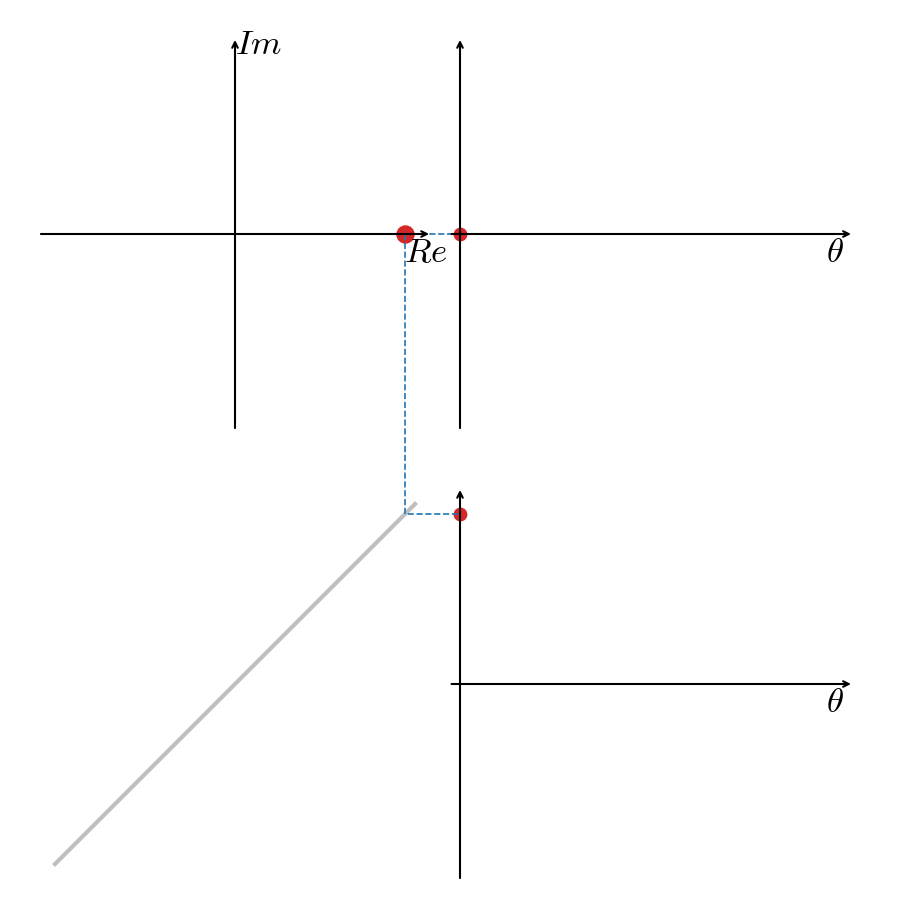

In [46]:
from matplotlib import pyplot,animation,cm
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

Nl,Nf,r,x0,y0 = 7,1000,1.7,[0,4,4],[0,0,-8]
n,theta = np.linspace(-(2*Nl-1),2*Nl-1,Nl*2),np.linspace(0,np.pi*2,Nf)
fn = r*np.array([2/(1j*k*np.pi)*np.exp(1j*k*(theta+np.pi/2)) for k in n])
fn1 = 1j*r*np.array([2/(1j*k*np.pi)*np.exp(1j*k*(theta)) for k in n])
f = np.sum(fn+fn1,axis=0)
clst = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-4,12],ylim=[-12,4])
ax.axis('off')
ax.plot([x0[0]-3.2,x0[0]+3.2],[y0[2]-3.2,y0[2]+3.2],lw=3,c='.5',alpha=.5)
[ax.annotate('',[(x0[i]+[3.5,7,7][i],y0[i]),(x0[i],y0[i]+3.5)][k],
              [(x0[i]+[-3.5,-.2,-.2][i],y0[i]),(x0[i],y0[i]-3.5)][k],
             arrowprops={'arrowstyle':'->','lw':1.5}) for i in range(3) for k in range(2)]
[ax.text([x0[i]+[3,6.5,6.5][i],x0[i]][k],[y0[i],y0[i]+3.7][k],
         ['$Re$',r'$\theta$',r'$\theta$','$Im$',r' ',r' '][i+k*3],
         size=25,va='top') for i in range(3) for k in range(2)]
sc=[ax.scatter(0,0,marker='o',color='tab:red',s=[150,80,80][k]) for k in range(3)]
lines=[ax.plot([],[],ls=['--','--','-','-'][k],lw=[1.2,1.2,3,3][k], c=clst[0])[0] for k in range(4)]
lines.append(ax.plot([],[],lw=3,c='tab:red')[0])
def animate(k):
  ejnt = r*f[:k+1]
  ejnt1=ejnt[-1]
  [sc[i].set_offsets([x0[i]+[ejnt1.real,theta[k],theta[k]][i],
           y0[i]+[ejnt1.imag,ejnt1.imag,ejnt1.real][i]]) for i in range(3)]
  lines[0].set_data([0,ejnt1.real,theta[k]+x0[1]], [0,ejnt1.imag,ejnt1.imag])
  lines[1].set_data([ejnt1.real,ejnt1.real,theta[k]+x0[2]],[ejnt1.imag,y0[2]+ejnt1.real,y0[2]+ejnt1.real])
  [lines[2+m].set_data(x0[1+m]+theta[:k+1],y0[1+m]+[ejnt.imag,ejnt.real][m]) for m in range(2)]
  lines[4].set_data(ejnt.real,ejnt.imag)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
anim.save("Fourier_square.mp4",writer=animation.FFMpegWriter(fps=50),dpi=200)